## Project UTS 

Project tentang Klasifikasi Judul Berita Olahraga dari Platfom Detik

List  Anggota Kelompok PBA:

- Emmanuel Mathew Krisna Rata /200710530

- Antonius Indra Wardhana / 200710542

- Farrel Rayner Nathanael Geovano / 200710560

- Edmond Sorensen / 200710617

- Paulus Bayu Kurnia Wicaksono / 200710691  


Inisialisasi

In [9]:
import numpy as np
import pandas as pd
import modSpellChecker as sc
from contractions_id import CONTRACTION_MAP
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import gensim
from gensim.models import Word2Vec
from gensim import models
#from pattern.en import tag
from nltk.corpus import wordnet as wn
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from gensim import corpora, models
import sklearn
#from normalization import normalize_corpus
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from datetime import datetime
import csv

In [10]:
dataset = pd.read_csv('detik_2023-10-18_08-30-26.csv')
dataset

,title,author,category,date,content,link
0,Penonton Jagokan Marc Marquez di Sprint Race M...,Okdwitya Karina Sari,MotoGP,"Sabtu, 14 Okt 2023 11:10 WIB","Meski sedang tak oke-oke amat, Marc Marquez ma...",https://sport.detik.com/moto-gp/d-6981885/peno...
1,Cara Anthony Ginting Balikin Motivasi Usai Gag...,Mercy Raya,Raket,"Rabu, 11 Okt 2023 21:45 WIB",Anthony Sinisuka Ginting mengaku sulit move on...,https://sport.detik.com/raket/d-6977523/cara-a...
2,Hasil Kualifikasi MotoGP Indonesia 2023: Luca ...,Rifqi Ardita Widianto,MotoGP,"Sabtu, 14 Okt 2023 10:28 WIB",Luca Marini secara impresif merebut pole posit...,https://sport.detik.com/moto-gp/d-6981874/hasi...
3,Kisah Fans Diundang Khusus Race Director untuk...,Okdwitya Karina Sari,MotoGP,"Sabtu, 14 Okt 2023 12:10 WIB","Bahagia betul Ira (42). Dia dan putranya, Mika...",https://sport.detik.com/moto-gp/d-6981921/kisa...
4,Ini Seragam Baru Kontingen Indonesia di Asian ...,Mercy Raya,Sport Lain,"Sabtu, 14 Okt 2023 11:30 WIB",Kontingen Indonesia yang akan tampil di Asian ...,https://sport.detik.com/sport-lain/d-6981910/i...
...,...,...,...,...,...,...
995,"Dapat Poin Usai Crash, Alex Marquez: MotoGP Ca...",Lucas Aditya,MotoGP,"Senin, 04 Sep 2023 17:30 WIB","Rider Gresini, Alex Marquez, menyebut balapan ...",https://sport.detik.com/moto-gp/d-6912778/dapa...
996,"Jadwal Lengkap China Open 2023, Tunggal Putra ...",Mercy Raya,Raket,"Senin, 04 Sep 2023 14:50 WIB",Turnamen bulutangkis China Open 2023 akan dise...,https://sport.detik.com/raket/d-6912459/jadwal...
997,Rekor! Penonton FIBA World Cup Jakarta Tembus ...,Mercy Raya,Basket,"Senin, 04 Sep 2023 15:55 WIB",Penonton FIBA World Cup Jakarta menembus angka...,https://sport.detik.com/basket/d-6912672/rekor...
998,Kata Dokter Soal Cedera Francesco Bagnaia,"detikTV, dtv",Detiktv,"Senin, 04 Sep 2023 08:43 WIB",Direktur Medis MotoGP dr. Angel Charte menyebu...,https://sport.detik.com/detiktv/d-6911700/kata...


Melakukan Penghapusan Category yang tidak tidak di gunakaan

In [11]:
kategori_tidak_ingin_dihapus = ['Category not found','Detiktv','Advertorial News Block']

dataset = dataset[~dataset['category'].isin(kategori_tidak_ingin_dihapus)]

In [12]:
dataset.shape

(930, 6)

In [13]:
df2 = dataset.groupby(['category'])['title'].count()
df2

category
Basket         57
F1             11
Fotosport      59
G Sport         3
MotoGP        224
Raket         269
Sport Lain    307
Name: title, dtype: int64

In [14]:
label = dataset.iloc[:,2]
feature = dataset.iloc[:,0]

In [15]:
label[0:10]

0        MotoGP
1         Raket
2        MotoGP
3        MotoGP
4    Sport Lain
5        MotoGP
6    Sport Lain
7    Sport Lain
8    Sport Lain
9    Sport Lain
Name: category, dtype: object

In [16]:
feature[0:10]

0    Penonton Jagokan Marc Marquez di Sprint Race M...
1    Cara Anthony Ginting Balikin Motivasi Usai Gag...
2    Hasil Kualifikasi MotoGP Indonesia 2023: Luca ...
3    Kisah Fans Diundang Khusus Race Director untuk...
4    Ini Seragam Baru Kontingen Indonesia di Asian ...
5    Hasil Sprint Race MotoGP Mandalika 2023: Jorge...
6    Rok Super Final 2023: Qarrar Posisi Tiga Besar...
7    Sumatra Selatan Raih Dua Medali di Hari Pertam...
8    Haornas 2023: Ketua PBSI Jabar Raih Penghargaa...
9    Fakta Seputar Futsal: Sejarah hingga Bedanya d...
Name: title, dtype: object

In [17]:
#fungsi2 untuk normalisasi dataset
character =['z','y','x','w','v','u','t','s','r','q','p','o','n','m','l','k','j','i','h','g','f','e','d','c','b','a',',','.',';',':','-','...','?','!','(',')','[',']','{','}','<','>','"','/','\'','#','-','@']
def repeatcharNormalize(text):
    for i in range(len(character)):
        charac_long = 5
        while charac_long>=2:
            char=character[i]*charac_long
            text=text.replace(char,character[i])
            charac_long-=1
        return text
def spellNormalize(text):
    spellCheck = []
    for i in text:
        if i not in character:
            j=sc.correction(i)
            spellCheck.append(j)
        else:
            spellCheck.append(i)
        return spellCheck
def tokenize_text(text):
    tokens=nltk.word_tokenize(text)
    tokens=[token.strip() for token in tokens]
    return tokens
def expand_contractions(text, contraction_mapping):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
    flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'","", expanded_text)
    return expanded_text
def stemmer_text(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    return text
# def lemmatize_text(text):
# pos_tagged_text = pos_tag_text(text)
# lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
# else word for word,
# pos_tag in pos_tagged_text]
# lemmatize_text=' '.join(lemmatized_tokens)
# return lemmatize_text

In [18]:
def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('',token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
factory = StopWordRemoverFactory()
stopword_list = factory.get_stop_words()
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
def normalize_corpus(corpus, tokenize=False):
    normalized_corpus = []
    for text in corpus:
        text = expand_contractions(text, CONTRACTION_MAP)
        text = stemmer_text(text)
        text = remove_special_characters(text)
        text = repeatcharNormalize(text)
        text = remove_stopwords(text)
        normalized_corpus.append(text)
        if tokenize:
            text = tokenize_text(text)
            text = spellNormalize(text)
            normalized_corpus.append(text)
    return normalized_corpus

In [19]:
#training dataset
def prepare_datasets(corpus, labels, test_data_proportion=0.3):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels,
    test_size=0.33,random_state=42)
    return train_X, test_X, train_Y, test_Y
train_corpus, test_corpus, train_labels, test_labels = prepare_datasets(feature,
                                                                        label,test_data_proportion=0.3)

Melakukan Proses Normalisasi DataSet

In [20]:
 #memanggil fungsi normalisasi dataset yang telah ditraining
norm_train_corpus = normalize_corpus(train_corpus)

In [21]:
norm_train_corpus[0:10]

['motogp 2023 marc marquez akhir tembus 10 besar',
 'motogp catalunya 2023 francesco bagnaia crash bawa ambulans',
 'kalah babak pertama fajar rian evaluasi teknis nonteknis',
 'jauh maverick vinales paling jauh kocak',
 'asi games 2023 ana tiwi lolos 16 besar hadap juara dunia',
 'jadwal motogp mandalika akhir pekan',
 'natasha karen tuai sukses kejurnas kuda 2023',
 'hasil hong kong open 2023 praveen melati kandas 32 besar',
 'aku putri kw usai kalah akane yamaguchi china open',
 'rok super final 2023 qarrar posisi tiga besar kualifikasi']

In [22]:
norm_test_corpus = normalize_corpus(test_corpus)

In [23]:
norm_test_corpus[0:10]

['indonesia beri kejut balap rimba raid 2023',
 'lompat kangkang erti tahap cara laku salah',
 'motogp san marino 2023 jorge martin ungkap senjata rahasia',
 'tanda bahaya buat tim indonesia jelang olimpiade 2024',
 'chico aura dwi wardoyo aku tak siap hadap main lawan',
 'jadwal motogp mandalika 2023 hari',
 'basuki hadimuljono bocor kostum defile indonesia asi games',
 'diggia raih hasil positif motegi kian pede tatap sisa motogp 2023',
 'menpora dito minta maaf indonesia gagal penuh target asi games 2023',
 'bagnaia jawara motogp mandalika 2023']

In [24]:
#Fungsi untuk mengekstraksi feature menggunakan TF-IDF Model
def tfidf_transformer(bow_matrix):
    transformer = TfidfTransformer(norm='l2',
                                    smooth_idf=True,
                                    use_idf=True)
    tfidf_matrix = transformer.fit_transform(bow_matrix)
    return transformer, tfidf_matrix
def tfidf_extractor(corpus, ngram_range=(1,1)):
    vectorizer = TfidfVectorizer(min_df=1,
                                norm='l2',
                                smooth_idf=True,
                                use_idf=True,
                                ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [25]:
#mengunakan model TF-IDF untuk mengekstraksi feature
tfidf_vectorizer, tfidf_train_features = tfidf_extractor(norm_train_corpus)
tfidf_test_features = tfidf_vectorizer.transform(norm_test_corpus)

Membuat Model 

In [26]:
#kami mengevaluasi model menggunakan fungsi train_predict_evaluate_model
#kami mengukur nilai accuracy,precission, recall, dan F1 score apakan nilainya sudah sesuai atau tidak. Jika nilainya mendekati 1 maka proses klasifikasi berhasil
from sklearn.linear_model import SGDClassifier
train_features=tfidf_train_features
train_labels=train_labels
test_features=tfidf_test_features
test_labels=test_labels

In [27]:
df_train = pd.DataFrame()
df_train['norm_train'] = norm_train_corpus
df_train['train_labels'] = train_labels
df_test = pd.DataFrame()
df_test['norm_test'] = norm_test_corpus
df_test['test_labels'] = test_labels

In [28]:
df_train.head()

,norm_train,train_labels
0,motogp 2023 marc marquez akhir tembus 10 besar,MotoGP
1,motogp catalunya 2023 francesco bagnaia crash ...,Raket
2,kalah babak pertama fajar rian evaluasi teknis...,NaN
3,jauh maverick vinales paling jauh kocak,MotoGP
4,asi games 2023 ana tiwi lolos 16 besar hadap j...,Sport Lain


In [29]:
df_test.head()

,norm_test,test_labels
0,indonesia beri kejut balap rimba raid 2023,NaN
1,lompat kangkang erti tahap cara laku salah,NaN
2,motogp san marino 2023 jorge martin ungkap sen...,MotoGP
3,tanda bahaya buat tim indonesia jelang olimpia...,NaN
4,chico aura dwi wardoyo aku tak siap hadap main...,NaN


In [30]:
train_features[0:1]

<1x1379 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [31]:
train_labels[0:1]

28    MotoGP
Name: category, dtype: object

In [32]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [33]:
clf = SGDClassifier(loss='hinge', max_iter=100)
#clf = LinearSVC(penalty='l2', loss='squared_hinge', max_iter=100)
#clf = MultinomialNB()

In [34]:
clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)
print("Label test: \n" + format(test_labels[:10]))
print("Prediction test: \n"+ format(predictions[:10]))

Label test: 
822    Sport Lain
730    Sport Lain
30         MotoGP
440    Sport Lain
223         Raket
406        MotoGP
126    Sport Lain
543        MotoGP
533    Sport Lain
507     Fotosport
Name: category, dtype: object
Prediction test: 
['Sport Lain' 'Sport Lain' 'MotoGP' 'Sport Lain' 'Raket' 'MotoGP'
 'Sport Lain' 'MotoGP' 'Sport Lain' 'MotoGP']


In [35]:
print("Accuration: "+format(clf.score(test_features,test_labels)))

Accuration: 0.8534201954397395


In [36]:
def get_metrics(true_labels, predicted_labels):
    print('Accuracy: ', np.round(metrics.accuracy_score(true_labels,
                                                        predicted_labels),2))
    print('Precision: ', np.round(metrics.precision_score(true_labels,
                                                        predicted_labels,
                                                        average='weighted'),2))
    print('Recall: ', np.round(metrics.recall_score(true_labels,
                                                        predicted_labels,
                                                        average='weighted'),2))
    print('F1 Score: ', np.round(metrics.f1_score(true_labels,
                                                        predicted_labels,
                                                        average='weighted'),2))
# mengevaluasi performa prediksi menggunakan model
get_metrics(true_labels=test_labels,predicted_labels=predictions)

Accuracy:  0.85
Precision:  0.86
Recall:  0.85
F1 Score:  0.85


In [37]:
test = ('Jeka Saragih On Fire Menatap Debut di UFC')

In [38]:
line = tfidf_vectorizer.transform([test])
line.shape

(1, 1379)

In [39]:
line

<1x1379 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [40]:
test = clf.predict(line)

In [41]:
test

array(['Sport Lain'], dtype='<U10')

## Model GridSearch SV

In [42]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [43]:
from sklearn.feature_selection import SelectKBest, chi2

# Include feature selection in the pipeline
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, norm='l2', smooth_idf=True, use_idf=True, ngram_range=(1, 1))),
    ('chi2', SelectKBest(chi2, k=1000)),  
    ('clf', SGDClassifier(loss='hinge', max_iter=100))
])

In [44]:
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],  
    'chi2__k': [1000, 2000, 5000],  
    'clf__alpha': [0.0001, 0.001, 0.01],
    'clf__max_iter': [100, 1000, 10000]
}

In [45]:
grid_search = GridSearchCV(text_clf, param_grid, cv=5, n_jobs=-1, verbose=2)

In [46]:
grid_search.fit(train_corpus, train_labels)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 2); total time=   0.1s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 2); total time=   0.1s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(1, 2); total time=   0.1s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(2, 2); total time=   0.1s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(2, 2); total time=   0.1s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(2, 2); total time=   0.0s
[CV] END chi2__k=1000, clf__alpha=0.0001, clf__max_iter=100, tfidf__ngram_range=(2, 2); total time=   0.0s
[CV] END chi2__k=1000, clf__alpha=0.0

/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 416,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('chi2',
                                        SelectKBest(k=1000,
                                                    score_func=<function chi2 at 0x7f93cfae98a0>)),
                                       ('clf', SGDClassifier(max_iter=100))]),
             n_jobs=-1,
             param_grid={'chi2__k': [1000, 2000, 5000],
                         'clf__alpha': [0.0001, 0.001, 0.01],
                         'clf__max_iter': [100, 1000, 10000],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)]},
             verbose=2)

In [47]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'chi2__k': 1000, 'clf__alpha': 0.001, 'clf__max_iter': 100, 'tfidf__ngram_range': (1, 1)}


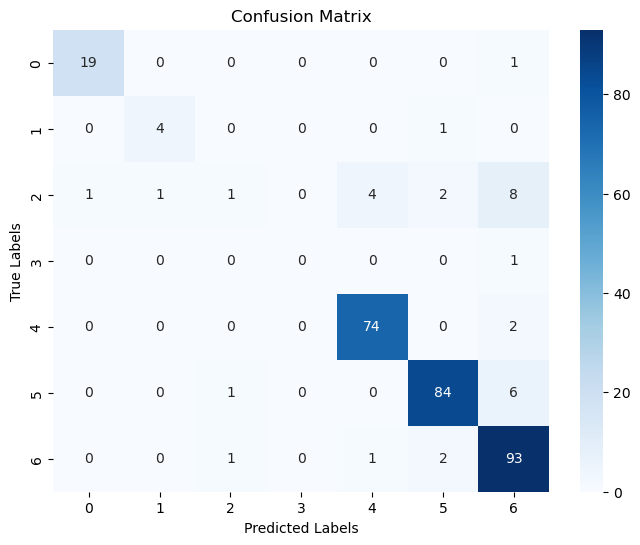

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
predicted_labels = best_model.predict(test_corpus)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()